## Utiskivanje vodenog žiga

Da bi se slika zaštitila od nedozvoljenog korišćenja, u praksi se često koristi **vodeni žig** (eng. *watermark*). On se može konstruisati u vremenskom domenu, kada je vidljiv golim okom ili u frekvencijskom domenu kada je golim okom teško uočljiv. 

<img src='assets/slika_sa_zigom_koji_se_vidi.png' title='primer slike sa zigom'>

Primer koji sledi približava tehniku kreiranja vodenog žiga u frekvencijskom domenu slike. Žig koji ćemo postaviti će biti u obliku kružnice sa centrom u tački koja odgovara centru slike i $n$ tačaka na samoj kružnici. 

In [1]:
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from PIL import Image

Prvo, učitavamo sliku za rad. 

In [3]:
image = Image.open('assets/slika.jpg').convert('L')

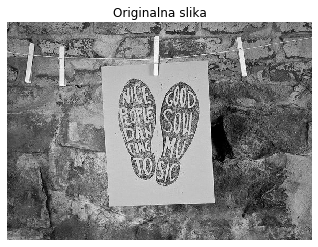

In [4]:
img = np.array(image)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Originalna slika')
plt.show()

Sledeća funkcija kreira vodeni žig u formi kružnice. Kao argumenti se očekuju dimenzije slike, poluprečnik kruga koji se kreira, kao i broj tačaka koje se nalaze na kružnici. 

In [5]:
def create_watermark(imgshape, r, n=200):
    
    # inicijalizujemo generator slucajnih brojeva
    np.random.seed(10)
    
    # vodeni zig je matrica istih dimenzija kao slika
    watermark = np.zeros(imgshape)
    
    # centar kruga je centar slike
    xc = imgshape[0] // 2
    yc = imgshape[1] // 2
    
    for i in range(n):
        # tacka (x, y) na krugu se moze dobiti preko polarnih koordinata
        x = xc + int(r * np.cos(2*np.pi*i/n))
        y = yc + int(r * np.sin(2*np.pi*i/n))
        
        # na odgovarajućoj poziciji se postavlja slučajno 0 ili 1
        watermark[x, y] = np.random.choice([0, 1])
        
    return watermark

Dalje, generišemo vodeni žig i prikazujemo kako izgleda. 

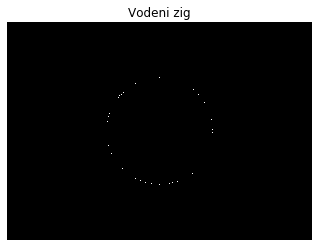

In [6]:
watermark = create_watermark(img.shape, 100)

plt.imshow(watermark, cmap='gray')
plt.title('Vodeni zig')
plt.axis('off')
plt.show()

Sam žig se može sačuvati kao slika i tajno čuvati. 

Dodajmo sada žig frekvencijskom domenu slike koju želimo da zaštitimo. Funkcija `add_watermark` dodaje žig slici. Kao argumente očekuje samu sliku, vodeni žig i faktor `alpha` kojim se kontroliše intenzitet prisutnosti žiga.

In [7]:
def add_watermark(img, watermark, alpha):

    c = fft.fft2(img)
    c_shifted = fft.fftshift(c)
    
    c_protected = c_shifted + alpha * watermark
    
    return np.abs(fft.ifft2(fft.ifftshift(c_protected)))

Sada dodajmo žig polaznoj slici i prikazujemo kako izgleda rezultujuća slika. Zbog prirode žiga kojeg smo koristili, promena je teško uočljiva.

In [8]:
img_protected = add_watermark(img, watermark, 10)
img_protected = Image.fromarray(img_protected)
img_protected.convert('L').save('assets/slika_sa_zigom.jpg')

<img src='assets/slika_sa_zigom.jpg'>

U slučaju spornih situacija, za slike koje su zaštićene na ovaj način, autorstvo bi se moglo pokazati oduzimanjem 2D Furijeove transformacije sporne slike i 2D Furijeove transformacije slike bez žiga. Ako bi se kao rezultat dobio žig (forma kružnice) odogvarajućeg intenziteta autorstvo bi bilo potvrđeno. 

Postoji i posebna disciplina koja se zove `steganografija`, a koja se koristi za sakrivanje tekstualnih poruka i drugih slika unutar samih slika. Furijeove transformacije se koriste i u ove svrhe. 